### **IMPORT LIBRARIES**

## First of all we are going to import the libraries we are going to be using.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

%matplotlib inline


### **IMPORT DATASET**

## The following code will import the dataset to the Colabs or Jupyter notebook. 




In [ ]:
file_path = '/content/Sales_Dataset.csv'    #Create file path to csv dataset 
sales_df = pd.read_csv(file_path)           #Read dataset in dataframe
sales_df.head()                             #Display data (first 5 rows) just to make sure it was successfully imported

,LotSizeSquareFeet,WaterViewYN,YearBuilt,BedroomsTotal,BathroomsFull,BathroomsHalf,LivingArea,GarageSpaces,CarportSpaces,FireplaceYN,PoolPrivateYN,ClosePrice
0,8549,True,2016,5,4,0,4439,3.0,NaN,False,True,675000
1,11108,False,2018,5,4,0,4069,3.0,NaN,False,False,540000
2,9920,False,1999,5,4,0,3834,3.0,NaN,True,True,515000
3,10035,True,1999,5,4,0,3828,3.0,NaN,True,True,495000
4,9600,True,2007,5,4,0,3382,3.0,NaN,False,True,494700


## Please note that every time we modify the dataframe it is a good practice to check a sample of the data to confirm the code did what we intended. For this we will often use sales_df.head(), which will show the first 5 rows of the dataframe.

### **EXPLORE THE DATA**

## We will now explore the data to get an idea of the characteristics of the dataset.

In [ ]:
sales_df.describe()       #Get main statistics of the dataset

,LotSizeSquareFeet,YearBuilt,BedroomsTotal,BathroomsFull,BathroomsHalf,LivingArea,GarageSpaces,CarportSpaces,ClosePrice
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,209.000000,7.0,210.000000
mean,8608.233333,2000.538095,3.700000,2.419048,0.095238,2183.052381,4.148325,0.0,306573.128571
std,2779.318027,4.749311,0.641842,0.615291,0.294245,596.492637,26.127498,0.0,71470.906697
min,1684.000000,1993.000000,2.000000,2.000000,0.000000,1191.000000,2.000000,0.0,167850.000000
25%,6577.500000,1997.000000,3.000000,2.000000,0.000000,1805.750000,2.000000,0.0,259925.000000
50%,8115.500000,2000.000000,4.000000,2.000000,0.000000,2023.000000,2.000000,0.0,285000.000000
75%,10080.000000,2003.000000,4.000000,3.000000,0.000000,2454.500000,3.000000,0.0,340750.000000
max,18439.000000,2019.000000,5.000000,4.000000,1.000000,4439.000000,380.000000,0.0,675000.000000


In [ ]:
sales_df.info()         #Get general information including number of rows, columns, and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LotSizeSquareFeet  210 non-null    int64  
 1   WaterViewYN        210 non-null    bool   
 2   YearBuilt          210 non-null    int64  
 3   BedroomsTotal      210 non-null    int64  
 4   BathroomsFull      210 non-null    int64  
 5   BathroomsHalf      210 non-null    int64  
 6   LivingArea         210 non-null    int64  
 7   GarageSpaces       209 non-null    float64
 8   CarportSpaces      7 non-null      float64
 9   FireplaceYN        210 non-null    bool   
 10  PoolPrivateYN      210 non-null    bool   
 11  ClosePrice         210 non-null    int64  
dtypes: bool(3), float64(2), int64(7)
memory usage: 15.5 KB


### **DATA CLEANING**

## Now that we know the dataset we can start cleaning and preparing the data for further exploration.
## The first thing we are going to do is rename the columns to make them easier to read. 

In [ ]:
#Rename columns
sales_df = sales_df.rename({'LotSizeSquareFeet':'Site', 'WaterViewYN':'View', 'BedroomsTotal':'Bedrooms', 
                            'BathroomsFull':'Full_Bathrooms', 'BathroomsHalf':'Half_Bathrooms', 'LivingArea':'GLA', 
                            'GarageSpaces':'Garage', 'CarportSpaces':'Carport', 'FireplaceYN':'Fireplace', 
                            'PoolPrivateYN':'Pool', 'ClosePrice':'Sales_Price'}, axis='columns')

sales_df.head()

,Site,View,YearBuilt,Bedrooms,Full_Bathrooms,Half_Bathrooms,GLA,Garage,Carport,Fireplace,Pool,Sales_Price
0,8549,True,2016,5,4,0,4439,3.0,NaN,False,True,675000
1,11108,False,2018,5,4,0,4069,3.0,NaN,False,False,540000
2,9920,False,1999,5,4,0,3834,3.0,NaN,True,True,515000
3,10035,True,1999,5,4,0,3828,3.0,NaN,True,True,495000
4,9600,True,2007,5,4,0,3382,3.0,NaN,False,True,494700


## In order to have the model work correctly we need to make sure all the data is of numeric type (integer or float).
## Let's check the data types. 

In [ ]:
sales_df.dtypes     #Check data types

Site                int64
View                 bool
YearBuilt           int64
Bedrooms            int64
Full_Bathrooms      int64
Half_Bathrooms      int64
GLA                 int64
Garage            float64
Carport           float64
Fireplace            bool
Pool                 bool
Sales_Price         int64
dtype: object

## As shown, most of our data is of type integer or float. There are three features that are of a boolean type. Let's transform them to integers.

In [ ]:
sales_df[['View', 'Fireplace','Pool']] = sales_df[['View', 'Fireplace','Pool']].astype(int)     #Convert boolean columns to integers
sales_df.head()

,Site,View,YearBuilt,Bedrooms,Full_Bathrooms,Half_Bathrooms,GLA,Garage,Carport,Fireplace,Pool,Sales_Price
0,8549,1,2016,5,4,0,4439,3.0,NaN,0,1,675000
1,11108,0,2018,5,4,0,4069,3.0,NaN,0,0,540000
2,9920,0,1999,5,4,0,3834,3.0,NaN,1,1,515000
3,10035,1,1999,5,4,0,3828,3.0,NaN,1,1,495000
4,9600,1,2007,5,4,0,3382,3.0,NaN,0,1,494700


## We have no use for the "YearBuilt" column, what we really need is the age. With the following code we will substracts the "YearBuilt" from the current year and create a new column we are calling "Age".

In [ ]:
sales_df['Age'] = pd.to_datetime('today').year - sales_df['YearBuilt']    #Substract YearBuilt from current year and create "Age"
sales_df.head()

,Site,View,YearBuilt,Bedrooms,Full_Bathrooms,Half_Bathrooms,GLA,Garage,Carport,Fireplace,Pool,Sales_Price,Age
0,8549,1,2016,5,4,0,4439,3.0,NaN,0,1,675000,5
1,11108,0,2018,5,4,0,4069,3.0,NaN,0,0,540000,3
2,9920,0,1999,5,4,0,3834,3.0,NaN,1,1,515000,22
3,10035,1,1999,5,4,0,3828,3.0,NaN,1,1,495000,22
4,9600,1,2007,5,4,0,3382,3.0,NaN,0,1,494700,14


## We have one column for Full Bathrooms and another for one for Half-Bathrooms. We can merge these two columns and create a new column that represents both of these features.

In [ ]:
sales_df['Half_Bathrooms'] = sales_df['Half_Bathrooms'] / 2                       #Modify Half_Bathrooms (dividing by 2) before merging
sales_df['Bathrooms'] = sales_df['Full_Bathrooms'] + sales_df['Half_Bathrooms']   #Merge (Add) Full_Bathrooms and Half_Bathrooms. Create new column Bathrooms
sales_df.head()

,Site,View,YearBuilt,Bedrooms,Full_Bathrooms,Half_Bathrooms,GLA,Garage,Carport,Fireplace,Pool,Sales_Price,Age,Bathrooms
0,8549,1,2016,5,4,0.0,4439,3.0,NaN,0,1,675000,5,4.0
1,11108,0,2018,5,4,0.0,4069,3.0,NaN,0,0,540000,3,4.0
2,9920,0,1999,5,4,0.0,3834,3.0,NaN,1,1,515000,22,4.0
3,10035,1,1999,5,4,0.0,3828,3.0,NaN,1,1,495000,22,4.0
4,9600,1,2007,5,4,0.0,3382,3.0,NaN,0,1,494700,14,4.0


## So far we have created two new columns (Age and Bathrooms). We do not need to keep 'YearBuilt', 'Full_Bathrooms', and 'Half_Bathrooms' anymore. Let's 
## delete them from our dataframe.

In [ ]:
sales_df = sales_df.drop(['YearBuilt','Full_Bathrooms','Half_Bathrooms'], axis=1)   #Drop YearBuilt, Full_Bathroom, and Half_Bathroom.
sales_df.head()

,Site,View,Bedrooms,GLA,Garage,Carport,Fireplace,Pool,Sales_Price,Age,Bathrooms
0,8549,1,5,4439,3.0,NaN,0,1,675000,5,4.0
1,11108,0,5,4069,3.0,NaN,0,0,540000,3,4.0
2,9920,0,5,3834,3.0,NaN,1,1,515000,22,4.0
3,10035,1,5,3828,3.0,NaN,1,1,495000,22,4.0
4,9600,1,5,3382,3.0,NaN,0,1,494700,14,4.0


## Now I want to rearrange the columns to look more like our original dataset. This step is optional. I prefer to do it to keep a familiar order of features.

In [ ]:
sales_df = sales_df[['Site','View','Age','Bedrooms','Bathrooms','GLA','Garage','Carport','Fireplace','Pool','Sales_Price']] #Rearrange columns
sales_df.head()

,Site,View,Age,Bedrooms,Bathrooms,GLA,Garage,Carport,Fireplace,Pool,Sales_Price
0,8549,1,5,5,4.0,4439,3.0,NaN,0,1,675000
1,11108,0,3,5,4.0,4069,3.0,NaN,0,0,540000
2,9920,0,22,5,4.0,3834,3.0,NaN,1,1,515000
3,10035,1,22,5,4.0,3828,3.0,NaN,1,1,495000
4,9600,1,14,5,4.0,3382,3.0,NaN,0,1,494700


## The dataframe is looking better. But we still have some null/NaN values we need to take care of before moving forward.

In [ ]:
sales_df.isnull().sum()       #Find null/NaN values

Site             0
View             0
Age              0
Bedrooms         0
Bathrooms        0
GLA              0
Garage           1
Carport        203
Fireplace        0
Pool             0
Sales_Price      0
dtype: int64

## We can see that most of the null values are from the feature 'Carport'. In fact 203 out of 210 properties have a null value for 'Carport'. We can either delete the entire column or we can fill them we a numerical value (like 0 or a median of other values). Since in this cases there are so many missing values, we are going to delete the entire column.

In [ ]:
sales_df = sales_df.drop(['Carport'], axis=1)     #Drop 'Carport' column.
sales_df.head()

,Site,View,Age,Bedrooms,Bathrooms,GLA,Garage,Fireplace,Pool,Sales_Price
0,8549,1,5,5,4.0,4439,3.0,0,1,675000
1,11108,0,3,5,4.0,4069,3.0,0,0,540000
2,9920,0,22,5,4.0,3834,3.0,1,1,515000
3,10035,1,22,5,4.0,3828,3.0,1,1,495000
4,9600,1,14,5,4.0,3382,3.0,0,1,494700


## Let's check for null values again

In [ ]:
sales_df.isnull().sum()     #Find null/NaN values

Site           0
View           0
Age            0
Bedrooms       0
Bathrooms      0
GLA            0
Garage         1
Fireplace      0
Pool           0
Sales_Price    0
dtype: int64

## It worked. But we still have one property with a null value for "Garage". Now, since it is only one value, it wouldn't be a good idea to delete the entire column. Instead, we are going to fill that data point with a number. I am choosing to use the number 0 because, knowing my MLS system, having a null value most likely means this property has no garage.

In [ ]:
sales_df = sales_df.fillna(0)   #Fill null values with a 0

sales_df.isnull().sum()         #Find null/NaN values

Site           0
View           0
Age            0
Bedrooms       0
Bathrooms      0
GLA            0
Garage         0
Fireplace      0
Pool           0
Sales_Price    0
dtype: int64

## Great. Our dataframe is now clean. We have no null values and all of our data types are numeric. It is time to create some visualizations.

### **VISUALIZATIONS**

## The first visualization we are going to try is the Histogram of Sales Prices using matplotlib.

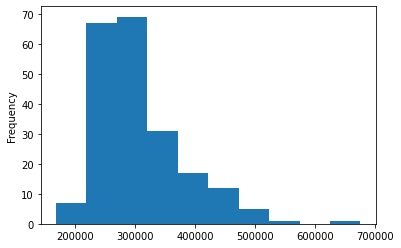

In [ ]:
sales_df['Sales_Price'].plot(kind='hist')   #Simple Histogram
plt.show()

## We can use that histogram to get an idea of the distribution of sales prices. However, if we want to use it for a report, it is probably better if we customize it to make more readible and more visually appealing.

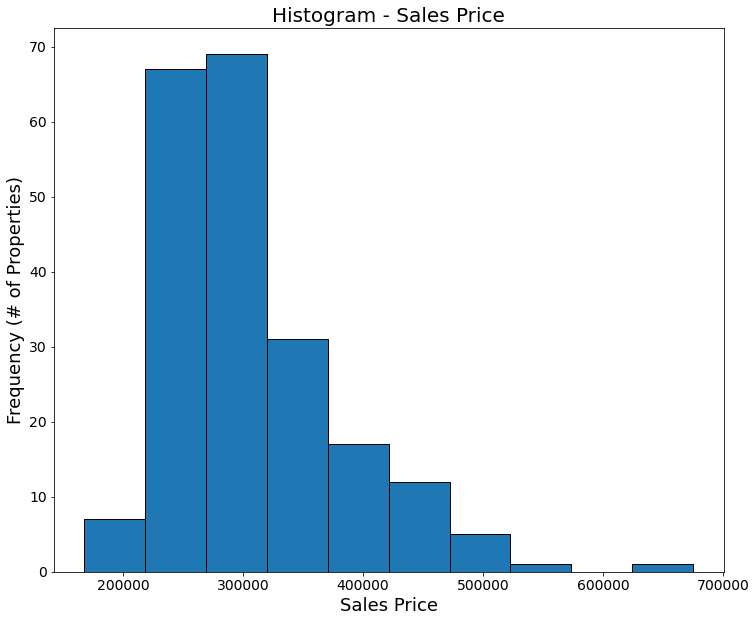

In [ ]:
sales_df['Sales_Price'].plot(kind='hist', figsize=(12,10), edgecolor='black', linewidth=1) 
plt.title('Histogram - Sales Price',fontsize=20)
plt.xlabel('Sales Price',fontsize=18)
plt.ylabel('Frequency (# of Properties)',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## As you can see, Histograms are highly customizable. I recommend reading the documentation to learn more about this and other visualizations with matplotlib (https://matplotlib.org)

## Let's try another histogram. But now we are going to use "GLA".
## We are also going to try a different color (lightblue).

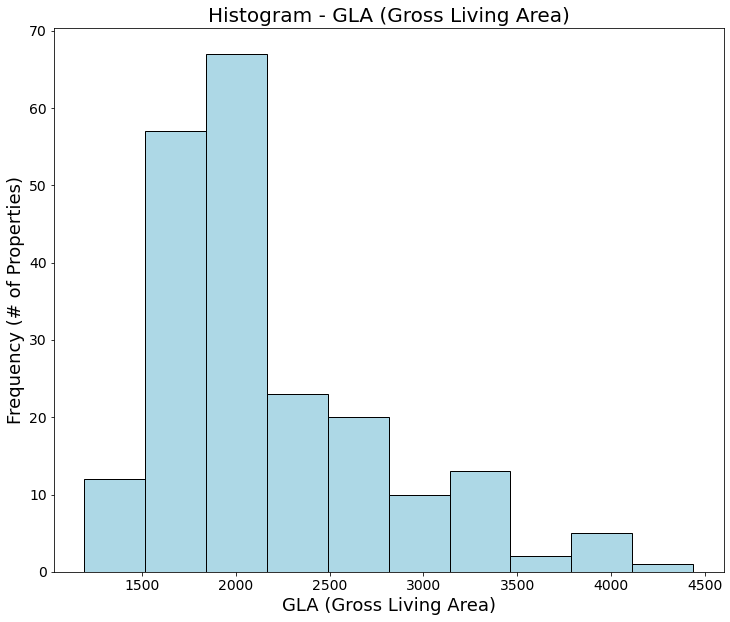

In [ ]:
sales_df['GLA'].plot(kind='hist', figsize=(12,10),color='lightblue',edgecolor='black', linewidth=1)
plt.title('Histogram - GLA (Gross Living Area)',fontsize=20)
plt.xlabel('GLA (Gross Living Area)',fontsize=18)
plt.ylabel('Frequency (# of Properties)',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


## Let's do one more to visualize 'Age'. 

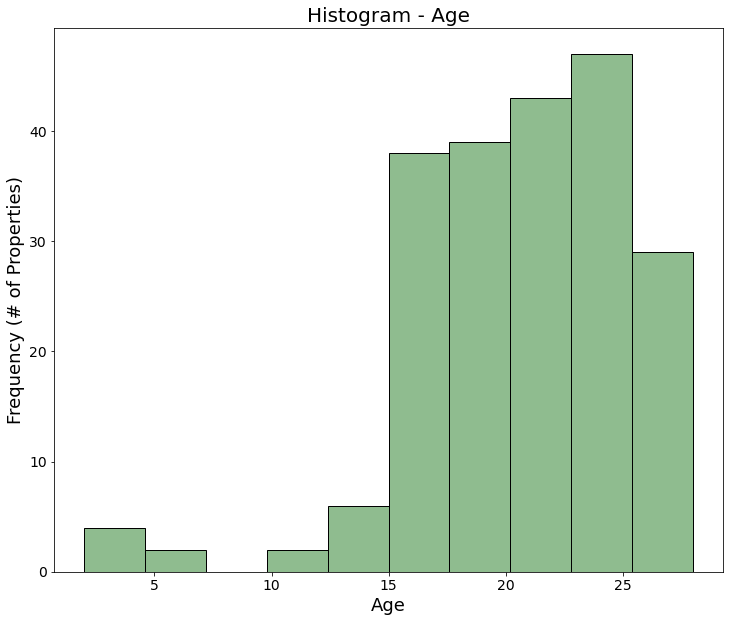

In [ ]:
sales_df['Age'].plot(kind='hist',figsize=(12,10),color='darkseagreen',edgecolor='black', linewidth=1)
plt.title('Histogram - Age',fontsize=20)
plt.xlabel('Age',fontsize=18)
plt.ylabel('Frequency (# of Properties)',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


## Next, we are going to show one of the favorite visualizations among appraisers, the scatterplot of GLA and Sales Price. (We will be using the seaborn library. For more information read the documentation at https://seaborn.pydata.org/)

The

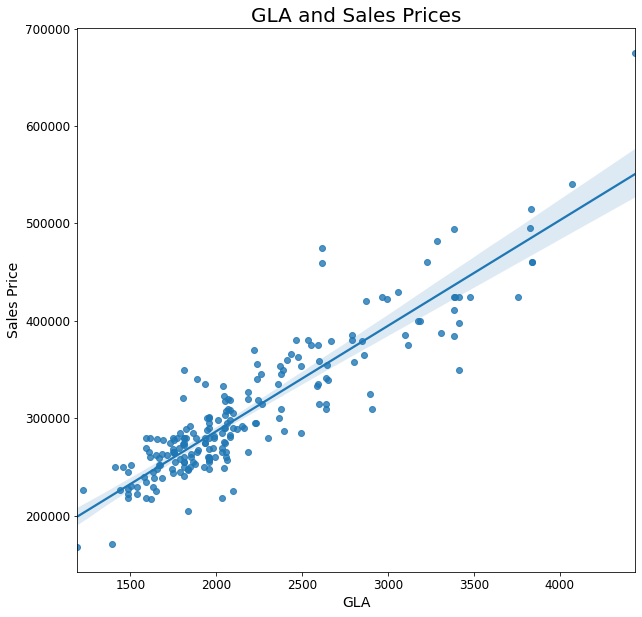

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(x='GLA', y='Sales_Price', data=sales_df)
plt.title('GLA and Sales Prices',fontsize=20)
plt.xlabel('GLA',fontsize=14)
plt.ylabel('Sales Price',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Let's try now a scatterplot of Site and Sales Price.

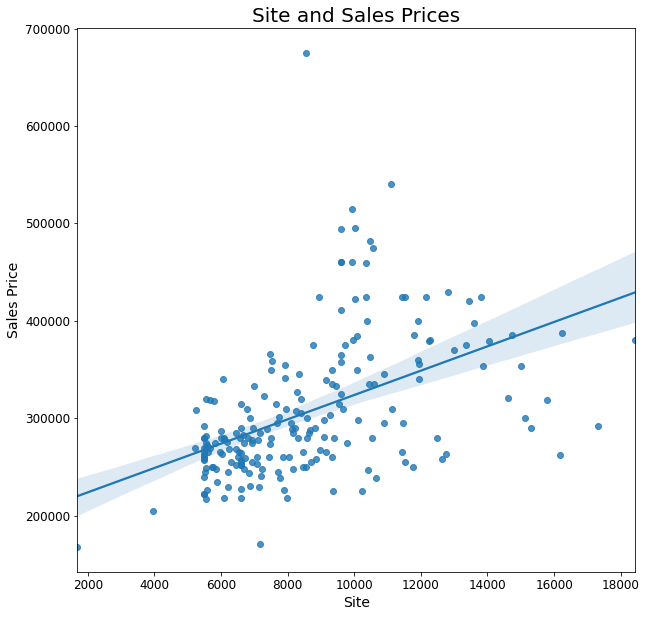

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(x='Site', y='Sales_Price', data=sales_df)
plt.title('Site and Sales Prices',fontsize=20)
plt.xlabel('Site',fontsize=14)
plt.ylabel('Sales Price',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
plt.show()

## Another great visualization is the heatmap for a correlation matrix.

## Let's take a quick look at the correlation matrix

In [ ]:
sales_df.corr()     #Run correlation matrix

,Site,View,Age,Bedrooms,Bathrooms,GLA,Garage,Fireplace,Pool,Sales_Price
Site,1.000000,-0.250851,-0.047395,0.377349,0.396751,0.466039,0.057883,0.124235,0.357358,0.485549
View,-0.250851,1.000000,-0.037876,0.024390,0.076089,-0.006968,-0.035697,0.150430,0.033979,0.064961
Age,-0.047395,-0.037876,1.000000,-0.313767,-0.412013,-0.472071,0.001644,0.206450,0.114419,-0.425663
Bedrooms,0.377349,0.024390,-0.313767,1.000000,0.644415,0.712319,0.042926,0.100129,0.283967,0.668227
Bathrooms,0.396751,0.076089,-0.412013,0.644415,1.000000,0.835726,0.072859,0.162889,0.237168,0.789761
GLA,0.466039,-0.006968,-0.472071,0.712319,0.835726,1.000000,-0.012028,0.121182,0.269489,0.903643
Garage,0.057883,-0.035697,0.001644,0.042926,0.072859,-0.012028,1.000000,-0.026790,-0.045061,-0.012330
Fireplace,0.124235,0.150430,0.206450,0.100129,0.162889,0.121182,-0.026790,1.000000,0.277564,0.168883
Pool,0.357358,0.033979,0.114419,0.283967,0.237168,0.269489,-0.045061,0.277564,1.000000,0.412499
Sales_Price,0.485549,0.064961,-0.425663,0.668227,0.789761,0.903643,-0.012330,0.168883,0.412499,1.000000


## Now we are going to use a heatmap to visualize the correlation matrix.

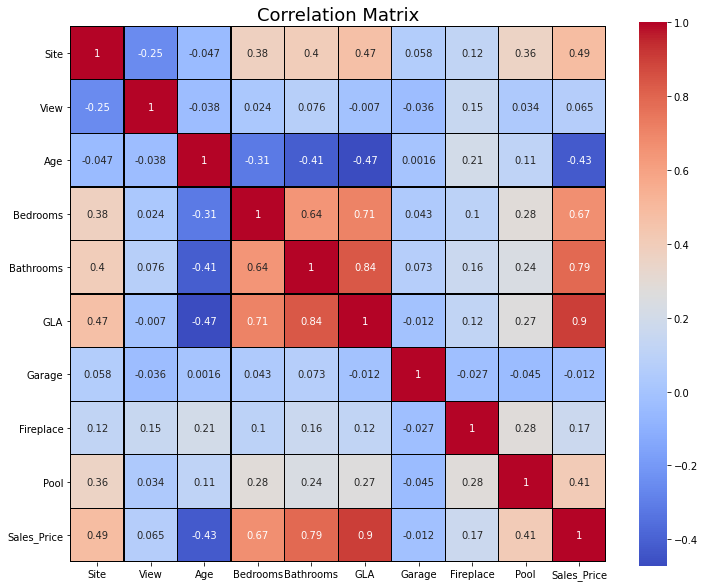

In [ ]:
plt.figure(figsize=(12,10))

sns.heatmap(sales_df.corr(),linewidths = 0.25,square = True,cmap = 'coolwarm',linecolor = 'black',annot= True);

plt.title("Correlation Matrix",fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


## We just saw only a few of the many kinds of visualizations that can be utilized to explore our data. To learn more about the matplotlib and seaborn libraries please refer to the documentation. Also, there are plenty of free online resources where you can keep learning more about data visualizations.
## It is time to start working with our regression models.


# **MODELS**

## We first import the libraries we are going to be using.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

## Before we run the linear regression and the decision tree regression we must define our predicting features (Site, View, Age, Bedrooms, Bathrooms, GLA, Garage, Fireplace, and Pool) as 'X' and our target feature (Sales Prices) 'y'.

In [ ]:
X = sales_df.iloc[:,:-1]      #Define predicting features, X
y = sales_df.iloc[:,-1]       #Define target, y

## We also need to split our dataframe in two sets. The train set, which we will use to fit the data, and the test set, which we will use to test the model with new data.
## We will assign 80% of our data to the train set and 20% 5to the test set. (Other common combinations are 75/25, 85/15, and 90/10).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.2, random_state=0)     #train-test split

## Next, we are going to define our linear regression model and fit the train set.

### **MODEL: Linear Regression**

In [ ]:
lin_regressor = LinearRegression()        #Define the model

lin_regressor.fit(X_train,y_train)        #Fit the train set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Great, we just created our first linear regression model. But now we want to know how well it performs with new data (test set). We will use Mean Absolute Error (MAE) to score the model.

In [ ]:
lin_pred = lin_regressor.predict(X_test)                                 #Get predictions using the test set

lin_mae = mean_absolute_error(lin_pred,y_test)                           #Calculate MAE

print('Linear Regression\nMean Absolute Error (MAE):', format(lin_mae, ',.2f'))    #Display MAE score

Linear Regression
Mean Absolute Error (MAE): 17,980.19


## The next model is a Decision Tree Regression. The process will be very similar to the previous model.

## **MODEL : Decision Tree**

## Let's define our Decision Tree model and fit the train set.

In [ ]:
decision_tree = DecisionTreeRegressor()     #Define the model
 
decision_tree.fit(X_train,y_train)          #Fit the train set

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

## Let's see how well it performs with new data (test set). We will use Mean Absolute Error (MAE) to score the model.

In [ ]:
dt_pred = decision_tree.predict(X_test)       #Get predictions using the test set

dt_mae = mean_absolute_error(dt_pred,y_test)  #Calculate MAE

print('Decision Tree\nMean Absolute Error (MAE):', format(dt_mae, ',.2f'))    #Display MAE score


Decision Tree
Mean Absolute Error (MAE): 32,225.86


## Based on the MAE scores it appears that the Linear Regression model is a better fit for our dataset.

## Let's now run both of our trained models using the subject property.

## **PREDICTIONS**

## For the next step we are going to import a csv file that contains the subject's information in the same format as our cleaned dataframe. The only missing feature should the "Sales Price" since that is the target we are trying to predict.

In [ ]:
sp_data_path = '/content/SP_Data.csv'           #Create file path to csv dataset 
sp_data = pd.read_csv(sp_data_path)             #Read dataset in dataframe

sp_data.head()                                  #Display data (first 5 rows) just to make sure it was successfully imported

,Site,View,Age,Bedrooms,Bathrooms,GLA,Garage,Fireplace,Pool
0,12100,0,16,4,3,2915,3,0,1


## Now we are going to define the predicting features and then (Finally) we are going to use our trained models to predict the subject's value.

In [ ]:
features = ['Site', 'View', 'Age', 'Bedrooms', 'Bathrooms', 'GLA','Garage','Fireplace','Pool']    #Define predicting features
sp_X = sp_data[features]

prediction_linear = int(lin_regressor.predict(sp_X))                    #Predict the subject's value using Linear Regresion model
prediction_decision_tree = int(decision_tree.predict(sp_X))             #Predict the subject's value using Decision Tree Regresion model

print('Estimated Values')                                               #Display estimated values
print()
print('Linear Regression: $', format(prediction_linear,','))
print('Decision Tree Regression: $', format(prediction_decision_tree,','))

Estimated Values

Linear Regression: $ 403,911
Decision Tree Regression: $ 420,000
